In [61]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ETFunctions as et
%matplotlib inline

Lattitude = -43.38
LongitudeTZ = 185
LongitudeML = 360 - 172.28

In [62]:
AlbedoDF = pd.read_pickle('.\DataFrames\DailyAlbedoCor.pkl')
EstAlbedoDF = pd.read_pickle('.\DataFrames\DailyAlbedoCorEstInt.pkl')
TnRData = pd.read_pickle('.\DataFrames\TempAndMet.pkl')
TnRHourlyMeans = TnRData.resample('H').mean()
TnRHourlyMeans.sort_index(axis=1,inplace=True)
TnRHourlySums = TnRData.resample('H').sum()
TnRHourlySums.sort_index(axis=1,inplace=True)
AlbedoHourly = AlbedoDF.resample('H').ffill().loc[TnRHourlyMeans.index]
AlbedoHourly.sort_index(axis=1,inplace=True)
EstAlbedoHourly = EstAlbedoDF.resample('H').ffill().loc[TnRHourlyMeans.index]
EstAlbedoHourly.sort_index(axis=1,inplace=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  # Remove the CWD from sys.path while we load stuff.


## Set up dataframe for net radiation measured on detailed heat balance plots

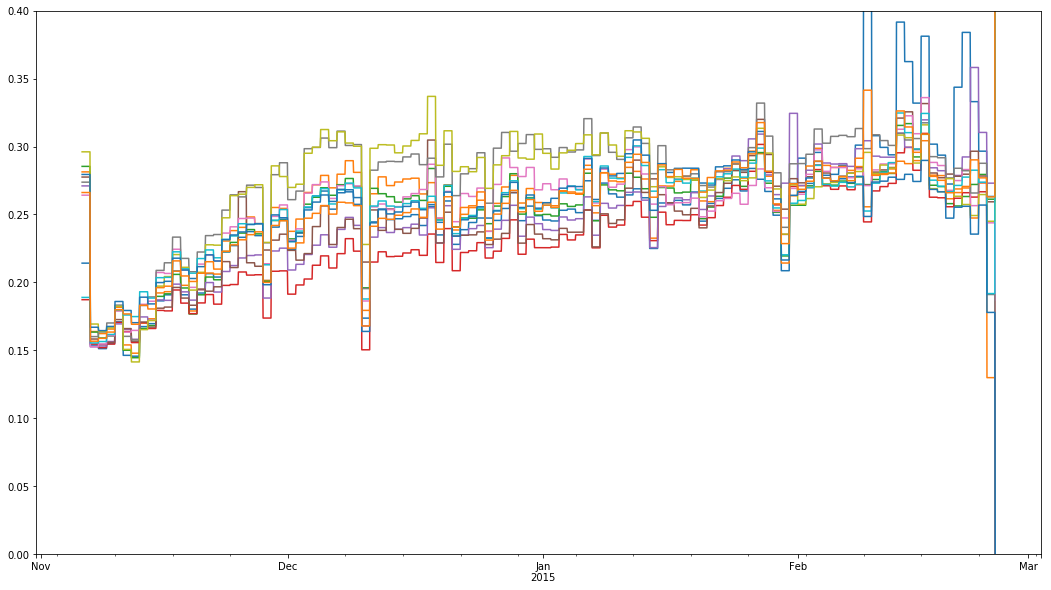

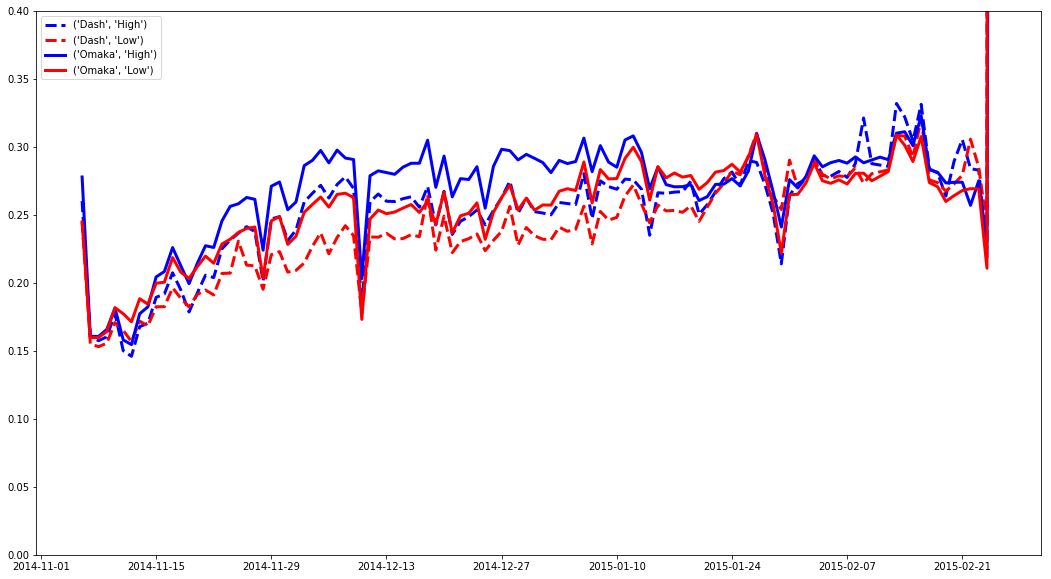

In [63]:
AlbedoHourly.plot(figsize=(18,10),legend=False,ylim=(0,.4))
AlbedoDaily = AlbedoHourly.resample('D').mean().groupby(level=('Cultivar','Irrigation'),axis=1).mean()
lines = ['--','--','-','-']
colors= ['b','r','b','r']
Graph = plt.figure(figsize=(18,10),)
pos=0
for treat in AlbedoDaily:
    plt.plot(AlbedoDaily.loc[:,treat].index,AlbedoDaily.loc[:,treat],lines[pos],color=colors[pos],linewidth=3,label=treat)
    pos+=1
plt.ylim(0,0.4)
plt.legend()

In [64]:
DetailSubSet = [('Dash','High','1'),('Dash','High','3'),('Dash','High','4'),
          ('Dash','Low','1'),('Dash','Low','3'),('Dash','Low','4'),
          ('Omaka','High','1'),('Omaka','High','3'),('Omaka','High','4'),
          ('Omaka','Low','1'),('Omaka','Low','2'),('Omaka','Low','4')]
DetailColumnIndex = pd.MultiIndex.from_tuples(DetailSubSet,
                                       names=['Cultivar','Irrigation','Block'])

In [65]:
RnDF = pd.DataFrame(index=TnRHourlyMeans.index,columns=DetailColumnIndex,)
RnDF.sort_index(axis=0, inplace=True)
RnDF.sort_index(axis=1, inplace=True)
for plot in RnDF.columns:
    RnDF.loc[:,plot] = [et.NetRadiation(TnRHourlySums.loc[x,'IncomingRadnMJ'].values[0],
                              TnRHourlyMeans.loc[x,'AirTemperature'].values[0],
                              TnRHourlyMeans.loc[x,'VP'].values[0],
                              Lattitude,
                              x.dayofyear,
                              TnRHourlyMeans.loc[x,'Duration'].values[0],
                              TnRHourlyMeans.loc[x,'Time'].values[0],
                              LongitudeTZ,
                              LongitudeML,
                              AlbedoHourly.loc[x,plot]) for x in RnDF.index]  

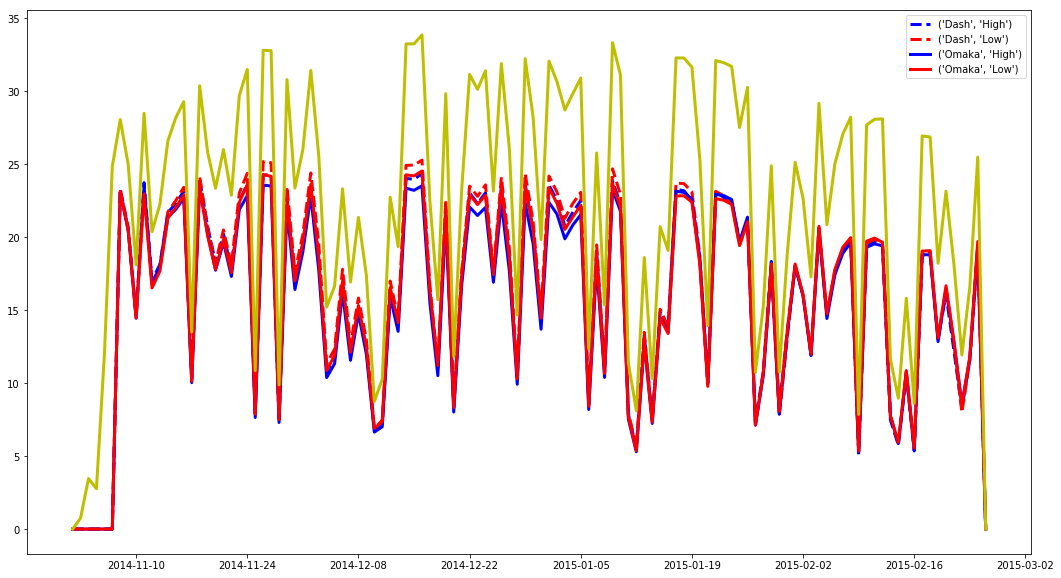

In [66]:
RnDaily = RnDF.resample('D').sum().groupby(level=('Cultivar','Irrigation'),axis=1).mean()
lines = ['--','--','-','-']
colors= ['b','r','b','r']
Graph = plt.figure(figsize=(18,10),)
pos=0
for treat in RnDaily:
    plt.plot(RnDaily.loc[:,treat].index,RnDaily.loc[:,treat],lines[pos],color=colors[pos],linewidth=3,label=treat)
    pos+=1
plt.plot(TnRHourlySums.loc[:,'IncomingRadnMJ'].resample('D').sum(),color='y',linewidth=3)
plt.legend()

## Convert radiation to W/m2

In [67]:
RnDF.index.name='Date'
RnDFLong = RnDF.unstack()
RnDFLong.name='Rn'
RnDFLong.to_pickle('.\DataFrames/NetRadiationMJ.pkl')
RnDFLong = RnDFLong * 1000000 / (60 * 60)

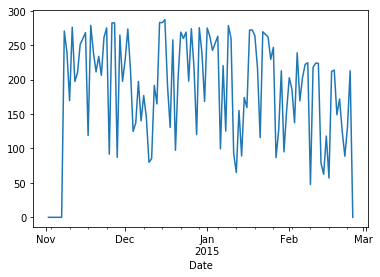

In [68]:
RnDFLong.loc[('Dash','High','1')].resample('D').mean().plot()

In [69]:
RnDFLong.name = 'Rn'

In [70]:
RnDFLong.to_pickle('.\DataFrames/NetRadiation.pkl')

## Set up data frame for net Radiation estimated for all plots

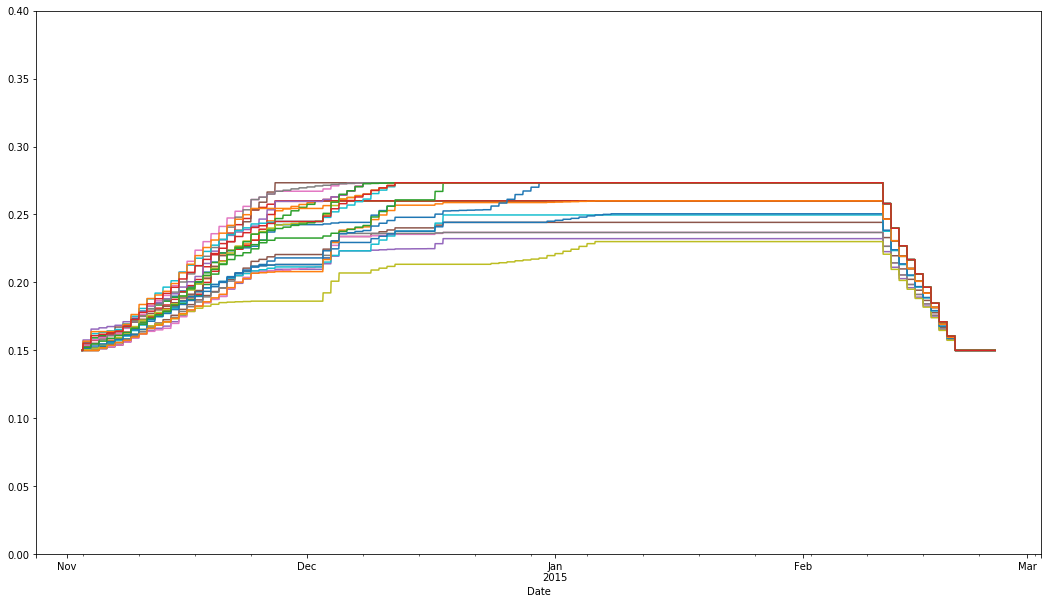

In [71]:
EstAlbedoHourly.plot(figsize=(18,10),legend=False,ylim=(0,.4))

In [72]:
FullColumnIndex = pd.MultiIndex.from_product([['Dash','Omaka'],
                                       ['High','Low','Mid'],
                                       ['1','2','3','4']],
                                       names=['Cultivar','Irrigation','Block'])

In [73]:
EstRnDF = pd.DataFrame(index=TnRHourlyMeans.index,columns=FullColumnIndex)
for plot in EstRnDF.columns:
    EstRnDF.loc[:,plot] = [et.NetRadiation(TnRHourlySums.loc[x,'IncomingRadnMJ'].values[0],
                              TnRHourlyMeans.loc[x,'AirTemperature'].values[0],
                              TnRHourlyMeans.loc[x,'VP'].values[0],
                              Lattitude,
                              x.dayofyear,
                              TnRHourlyMeans.loc[x,'Duration'].values[0],
                              TnRHourlyMeans.loc[x,'Time'].values[0],
                              LongitudeTZ,
                              LongitudeML,
                              EstAlbedoHourly.loc[x,plot]) for x in RnDF.index]  

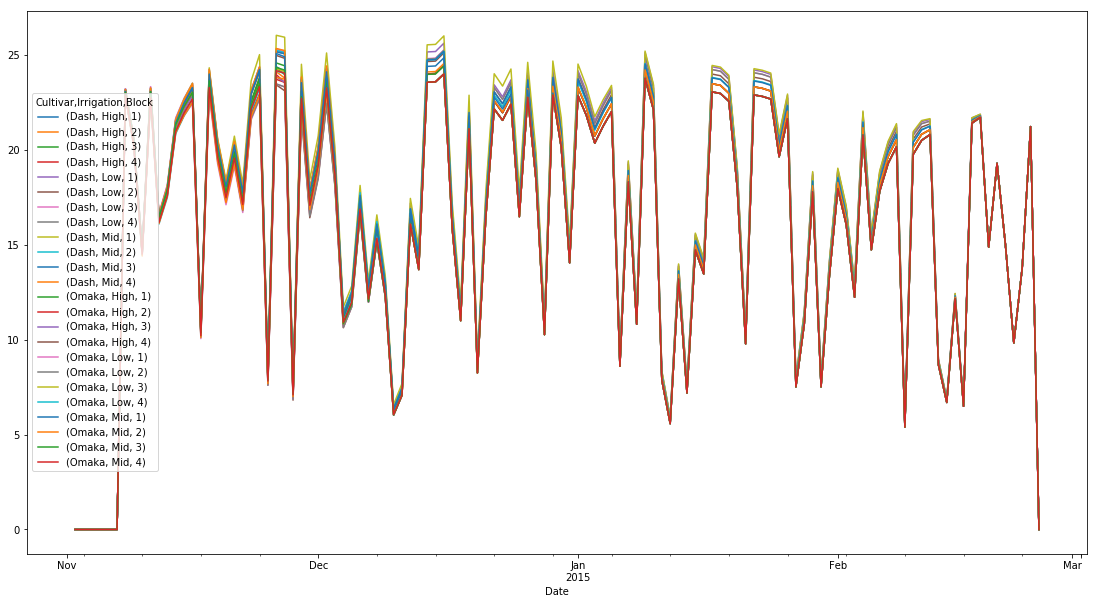

In [74]:
EstRnDF.resample('D').sum().plot(figsize=(19,10))

## Make Long

In [75]:
EstRnDF.index.name='Date'
EstRnDFDaily = EstRnDF.resample('D').sum()
EstRnDFLong = EstRnDFDaily.unstack()
EstRnDFLong = EstRnDFLong

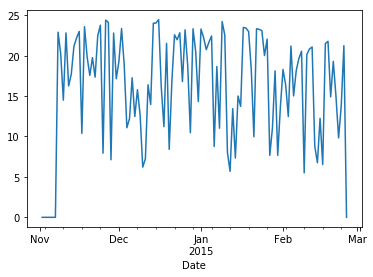

In [76]:
EstRnDFLong.loc[('Dash','High','1')].plot()

In [77]:
EstRnDFLong.to_pickle('.\DataFrames\EstNetRadiation.pkl')

In [82]:
RnDF2 = pd.DataFrame(index=TnRHourlyMeans.index,columns=DetailColumnIndex)
for plot in RnDF2.columns:
    RnDF2.loc[:,plot] = [et.NetRadiation(TnRHourlySums.loc[x,'IncomingRadnMJ'][0],
                              TnRHourlyMeans.loc[x,'IR_SurfaceTemp'].loc[plot[0:2]].iloc[int(plot[2])-1],
                              TnRHourlyMeans.loc[x,'VP'][0],
                              Lattitude,
                              x.dayofyear,
                              TnRHourlyMeans.loc[x,'Duration'][0],
                              TnRHourlyMeans.loc[x,'Time'][0],
                              LongitudeTZ,
                              LongitudeML,
                              AlbedoHourly.loc[x,plot]) for x in RnDF2.index]  

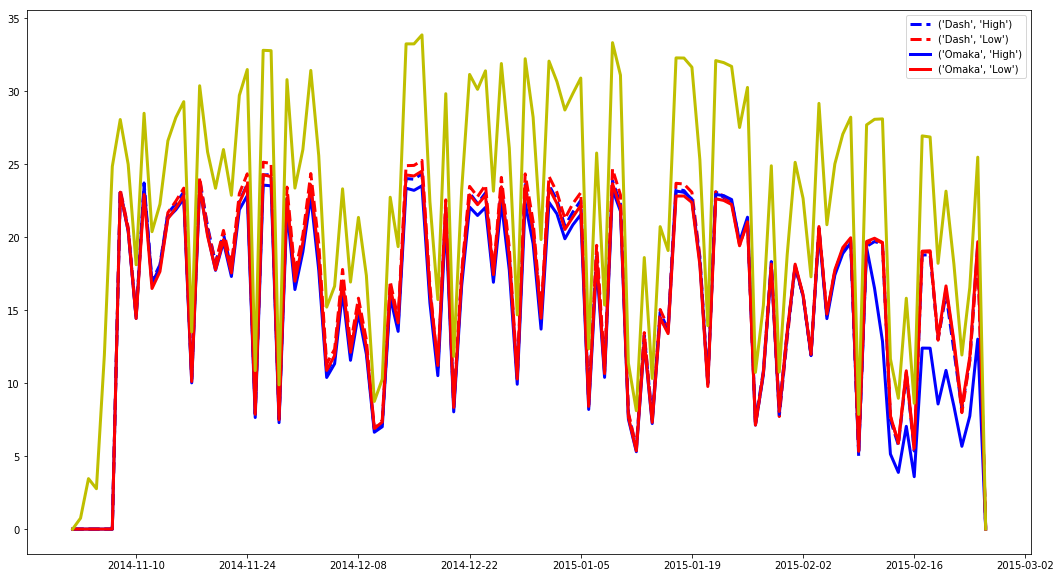

In [87]:
Rn2Daily = RnDF2.resample('D').sum().groupby(level=('Cultivar','Irrigation'),axis=1).mean()
lines = ['--','--','-','-']
colors= ['b','r','b','r']
Graph = plt.figure(figsize=(18,10),)
pos=0
for treat in Rn2Daily:
    plt.plot(Rn2Daily.loc[:,treat].index,Rn2Daily.loc[:,treat],lines[pos],color=colors[pos],linewidth=3,label=treat)
    pos+=1
plt.plot(TnRHourlySums.loc[:,'IncomingRadnMJ'].resample('D').sum(),color='y',linewidth=3)
plt.legend()

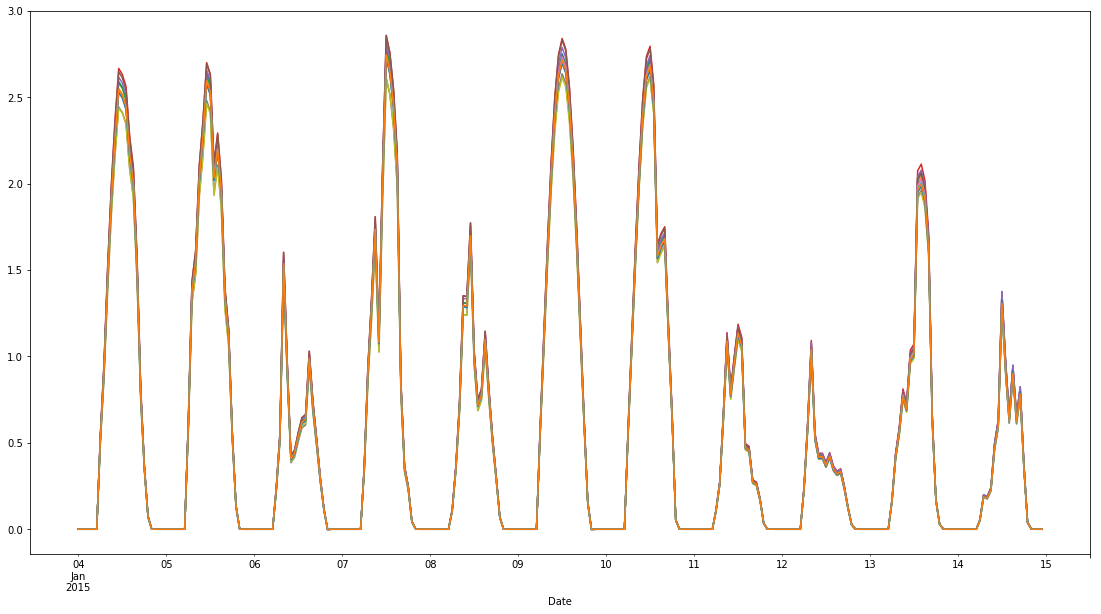

In [88]:
RnDF2.loc['2015-01-04':'2015-01-14',:].plot(legend=False,figsize=(19,10))

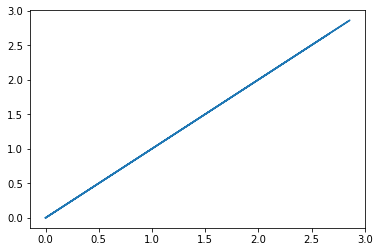

In [89]:
plt.plot(RnDF2.loc['2015-01-04':'2015-01-14',('Dash','Low','1')],RnDF.loc['2015-01-04':'2015-01-14',('Dash','Low','1')])

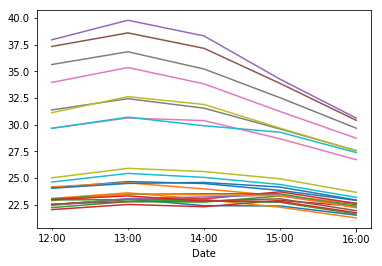

In [91]:
TnRHourlyMeans.iloc[1455:1460,:]['IR_SurfaceTemp'].plot(legend=False)

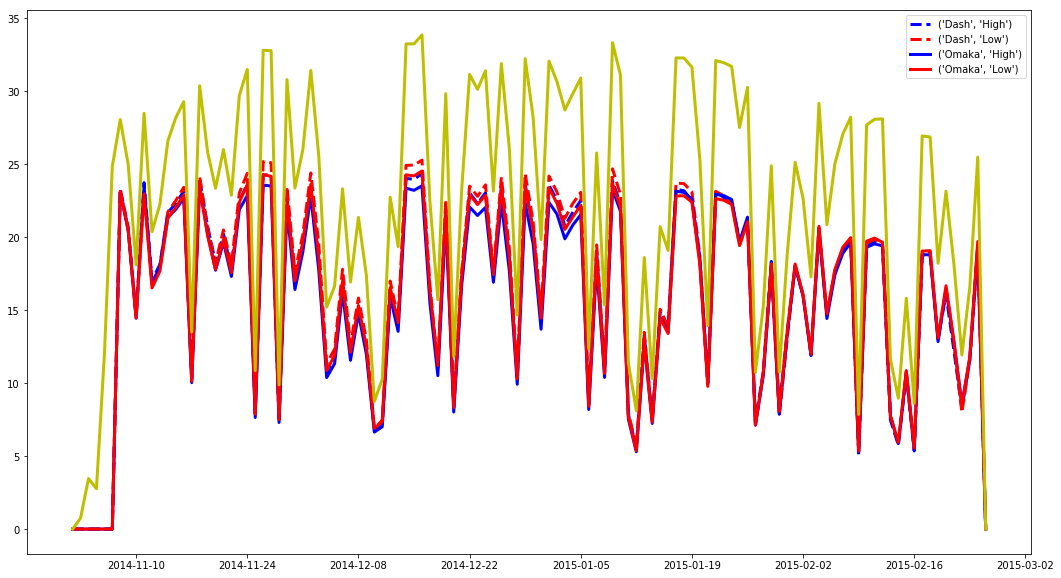

In [92]:
RnDaily = RnDF.resample('D').sum().groupby(level=('Cultivar','Irrigation'),axis=1).mean()
lines = ['--','--','-','-']
colors= ['b','r','b','r']
Graph = plt.figure(figsize=(18,10),)
pos=0
for treat in RnDaily:
    plt.plot(RnDaily.loc[:,treat].index,RnDaily.loc[:,treat],lines[pos],color=colors[pos],linewidth=3,label=treat)
    pos+=1
plt.plot(TnRHourlySums.loc[:,'IncomingRadnMJ'].resample('D').sum(),color='y',linewidth=3)
plt.legend()